# Algorithm Selection

In [96]:
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics, preprocessing
import seaborn as sns
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [97]:
#read data
data = pd.read_excel('default of credit card clients.xls')
data.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**Information**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:<br>
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. <br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



## Preprocess

### Check missing values

In [98]:
data.isnull().sum() # check missing values

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [99]:
data.dtypes

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object

### Convert Datatype from Object to Int

In [100]:
data=data.drop([0])

In [101]:
df = data.astype(int)
df.dtypes

Unnamed: 0    int64
X1            int64
X2            int64
X3            int64
X4            int64
X5            int64
X6            int64
X7            int64
X8            int64
X9            int64
X10           int64
X11           int64
X12           int64
X13           int64
X14           int64
X15           int64
X16           int64
X17           int64
X18           int64
X19           int64
X20           int64
X21           int64
X22           int64
X23           int64
Y             int64
dtype: object

In [102]:
df = df.drop(columns='Unnamed: 0')

In [103]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Explore Dataset 

In [104]:
df.shape

(30000, 24)

### How many defaults ?

In [81]:
print('Not default', round(df['Y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Default', round(df['Y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Not default 77.88 % of the dataset
Default 22.12 % of the dataset


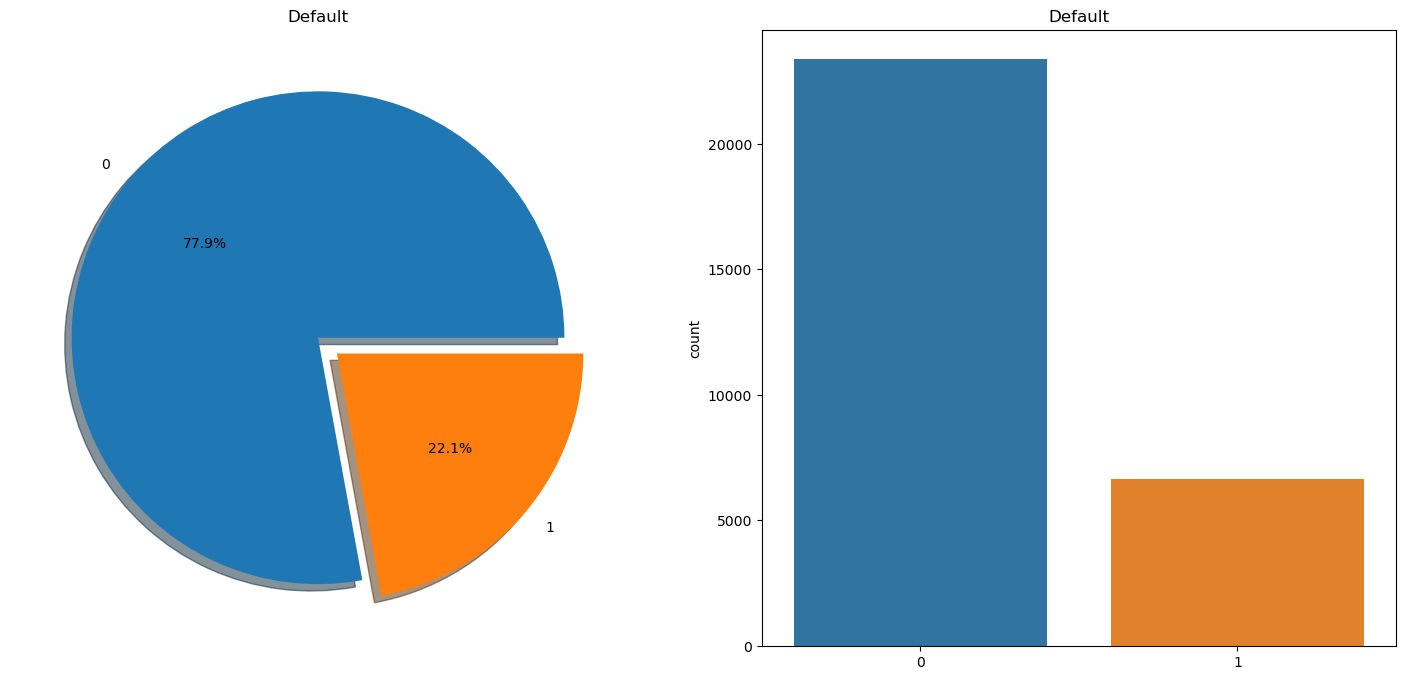

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Default')
ax[0].set_ylabel('')
sns.countplot(data=df,x="Y", ax=ax[1])
ax[1].set_title('Default')
plt.xlabel(' ')
plt.show()

### Correlation Coefficients to default

In [83]:
df.corr()['Y'] #Show the correlation Coefficients to default

X1    -0.153520
X2    -0.039961
X3     0.028006
X4    -0.024339
X5     0.013890
X6     0.324794
X7     0.263551
X8     0.235253
X9     0.216614
X10    0.204149
X11    0.186866
X12   -0.019644
X13   -0.014193
X14   -0.014076
X15   -0.010156
X16   -0.006760
X17   -0.005372
X18   -0.072929
X19   -0.058579
X20   -0.056250
X21   -0.056827
X22   -0.055124
X23   -0.053183
Y      1.000000
Name: Y, dtype: float64

<AxesSubplot:>

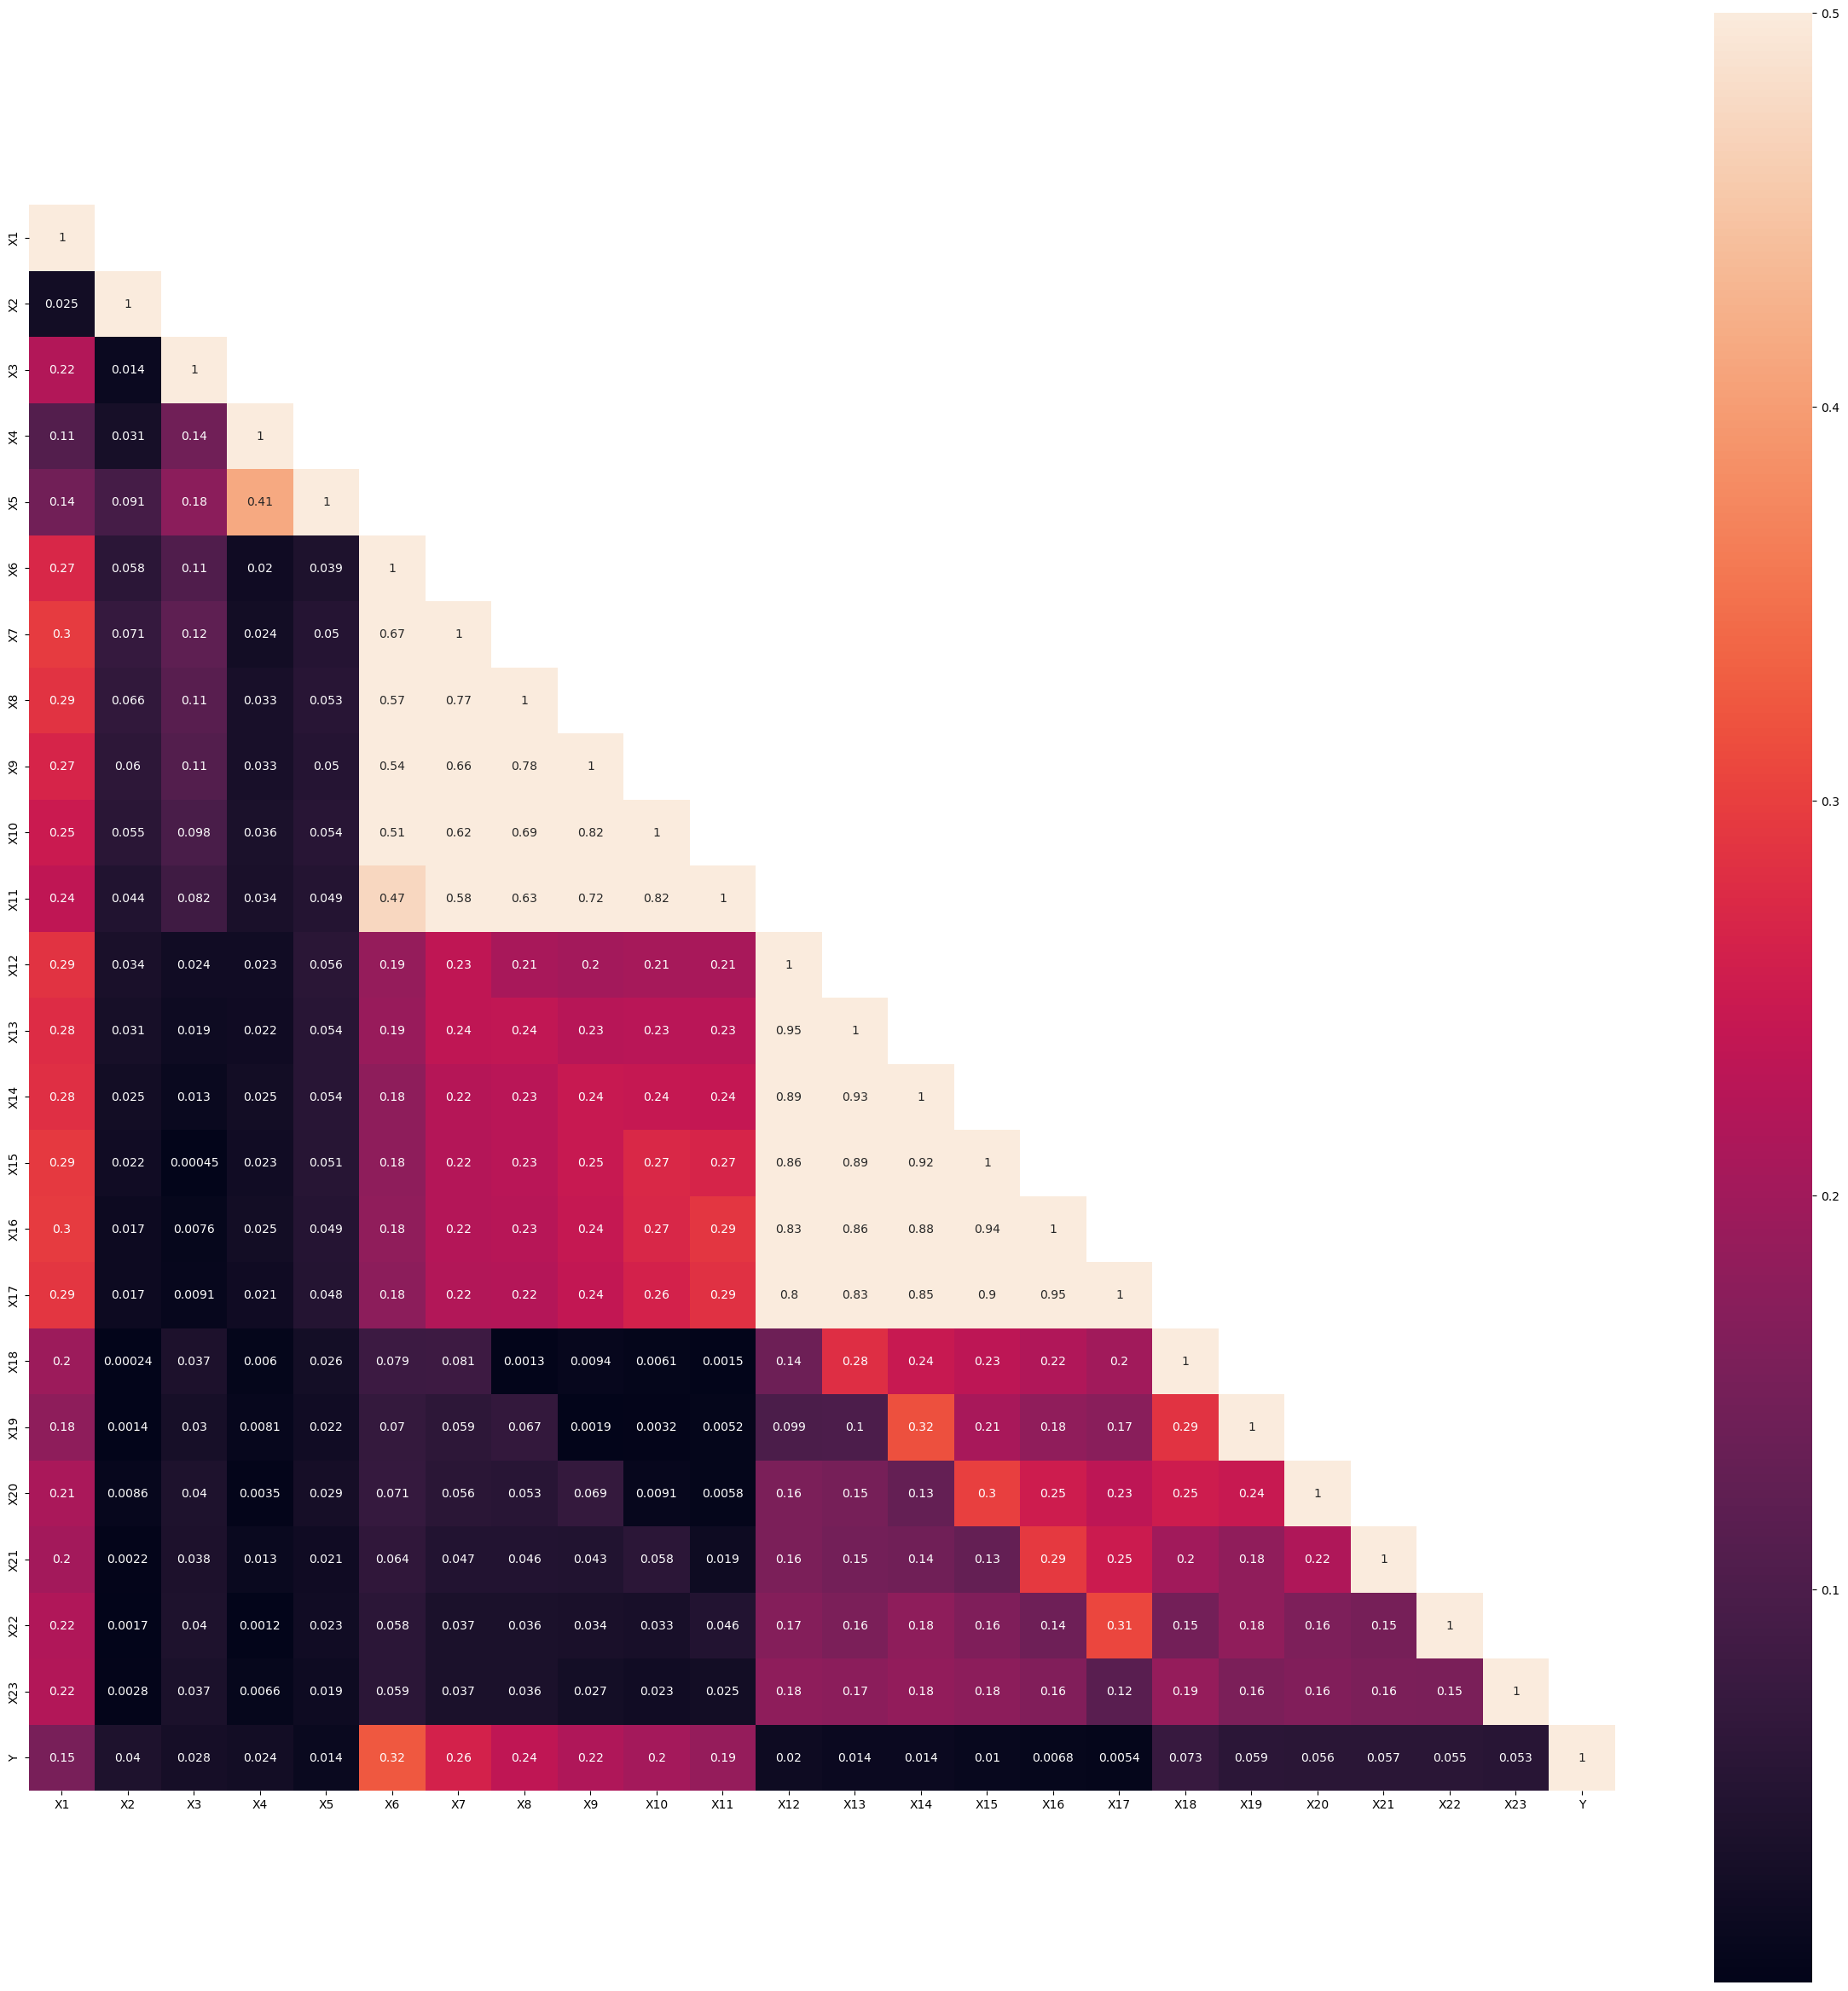

In [84]:
corr_matrix = df.corr().abs()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(corr_matrix,mask=mask,vmax=.5,  square=True,annot=True)

### Observation
X6 - X11 are highly correlated with Default <br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>

 ### Gender--> Categorical Feature

In [85]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [86]:
df.loc[df['X2'] ==1, 'X2'] = 'male'
df.loc[df['X2'] ==2, 'X2'] = 'female'

In [87]:
df.groupby(['X2','Y'])['Y'].count() #1=male, 2=female

X2      Y
female  0    14349
        1     3763
male    0     9015
        1     2873
Name: Y, dtype: int64

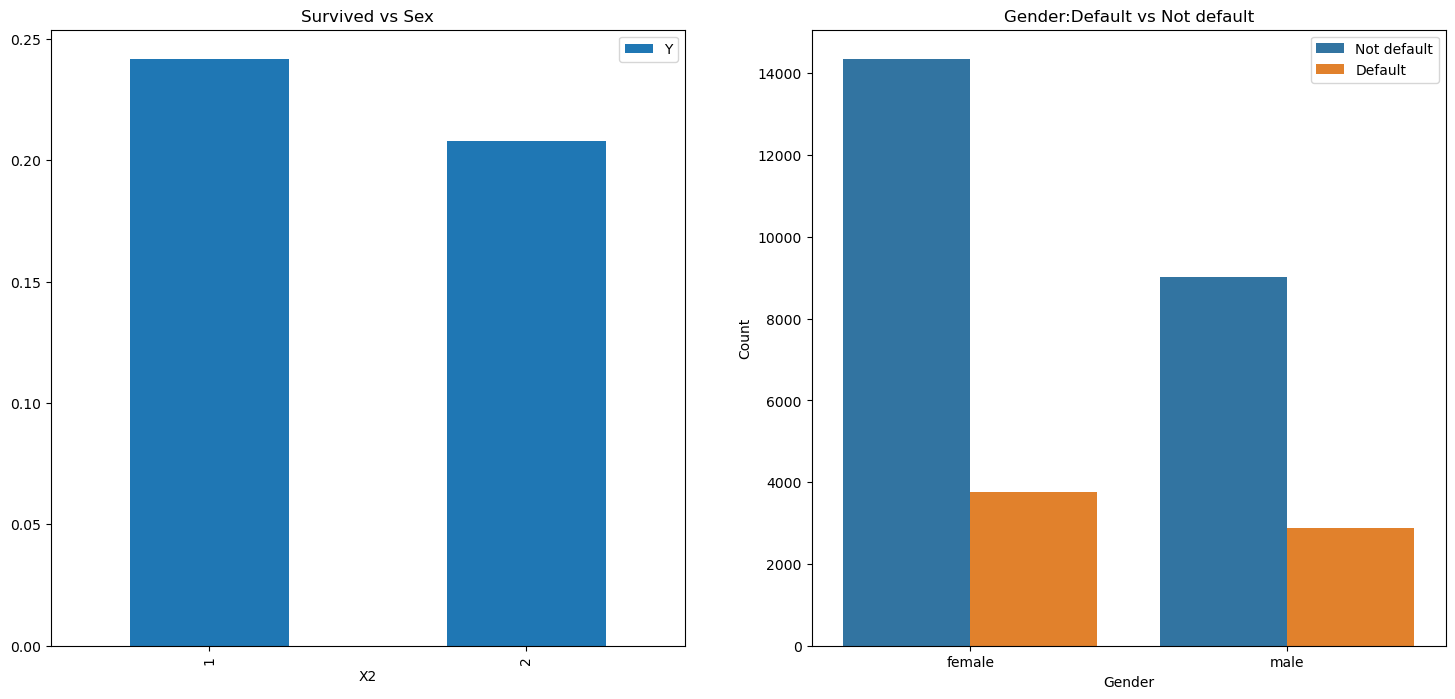

In [88]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['X2','Y']].groupby(['X2']).mean().plot.bar(ax=ax[0])

ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'X2',hue='Y',data= df,ax=ax[1])
ax[1].set_title('Gender:Default vs Not default')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not default','Default'])
plt.show()

### Age--> Continous Feature

In [89]:
print('Oldest Custmer was of:',df['X5'].max(),'Years')
print('Youngest Custmer was of:',data['X5'].min(),'Years')
print('Average Age',data['X5'].mean(),'Years')

Oldest Custmer was of: 79 Years
Youngest Custmer was of: 21 Years
Average Age 35.4855 Years


In [90]:
df.loc[df['X3'] >=4, 'X3'] = 4
df.loc[df['X3'] <=1, 'X3'] = 1
#1 = graduate school; 2 = university; 3 =   high school; 4 = others

In [91]:
df.loc[df['X3'] ==1, 'X3'] = 'graduate_school'
df.loc[df['X3'] ==2, 'X3'] = 'university'
df.loc[df['X3'] ==3, 'X3'] = 'high_school'
df.loc[df['X3'] ==4, 'X3'] = 'others'

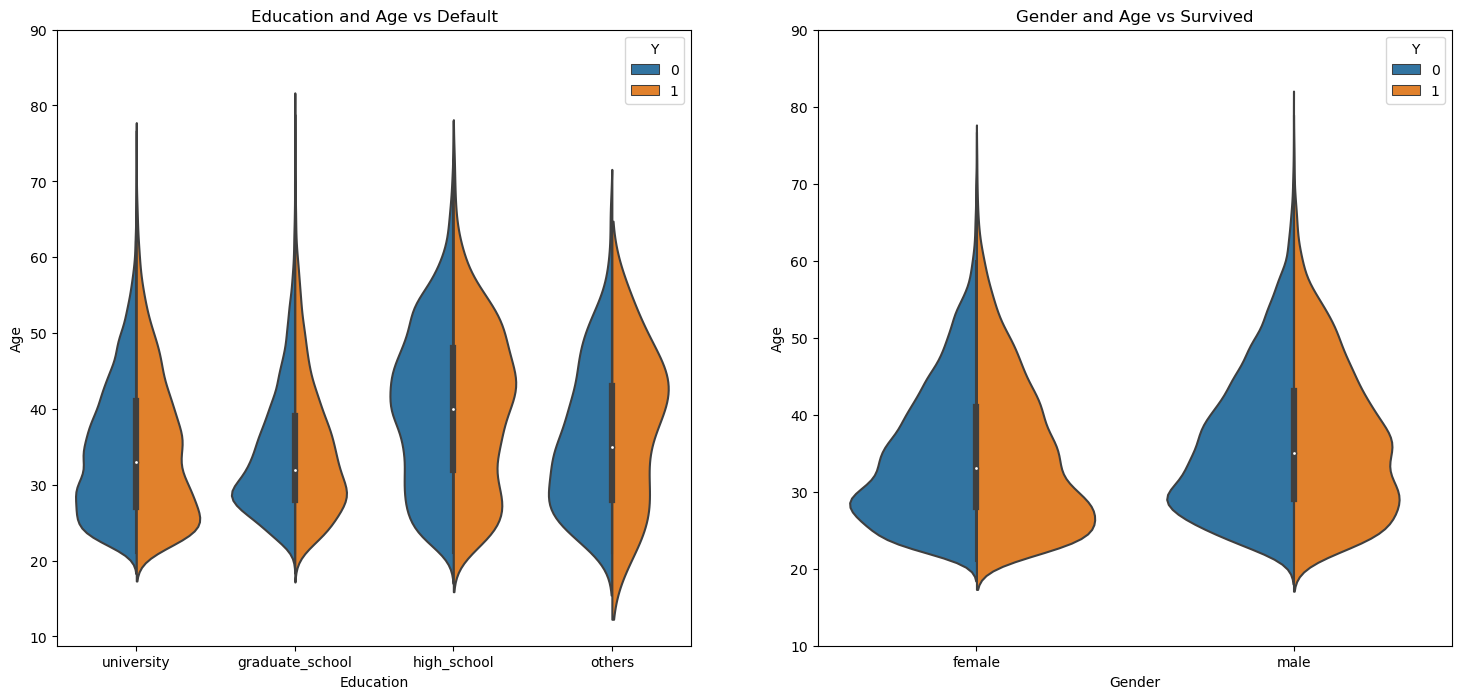

In [92]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x= "X3",y="X5", hue="Y", data=df,split=True,ax=ax[0])
ax[0].set_title('Education and Age vs Default')
ax[0].set_yticks(range(10,100,10))
ax[0].set_xlabel('Education') 
ax[0].set_ylabel('Age')
ax[0].set_label('Default')
sns.violinplot(x="X2",y="X5", hue="Y", data=df,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Survived')
ax[1].set_yticks(range(10,100,10))
ax[1].set_xlabel('Gender') 
ax[1].set_ylabel('Age')
ax[1].set_label('Notdefault')
plt.show()

## Generate training and test data

In [105]:
#importing all the required ML packages
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LinearRegression #LinearRegression
from sklearn.linear_model import LogisticRegression #LogisticRegression

In [106]:
# Divide the whole data to 2 parts, 80% as training set, 20% as test set
train,test=train_test_split(df,test_size=0.2,random_state=0,stratify=df['Y'])

train_X=train[train.columns[:-1]]
train_y=train[train.columns[-1]]

test_X=test[test.columns[:-1]]
test_y=test[test.columns[-1]]

In [107]:
train_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
6671,320000,1,1,2,26,-1,0,0,0,0,...,13917,12125,0,0,1267,1700,243,0,0,220000
12887,200000,1,1,1,40,-1,-1,-1,-1,-1,...,6360,2620,5900,37084,5007,7096,2620,6000,17703,4914
16219,120000,2,1,2,45,0,0,0,0,0,...,87941,89737,95451,97379,3079,3185,3251,7200,3600,3900
5773,20000,2,1,2,22,-2,-2,-2,-2,-2,...,904,304,0,302,0,913,304,0,302,7676
22647,30000,2,3,1,42,0,0,0,0,0,...,13375,2592,30094,29147,1371,1210,1000,30000,1046,1390


In [108]:
train_y.head()

6671     0
12887    1
16219    0
5773     0
22647    1
Name: Y, dtype: int64

## Algorithm Comparison 

###  Decision Tree

In [109]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction1=model.predict(test_X)
print("The prediction values are: ",prediction1)

The prediction values are:  [0 0 0 ... 1 0 0]


In [110]:
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,test_y))

The accuracy of the Decision Tree is 0.7205


In [111]:
print('The f1_score of the Decision Tree is',f1_score(test_y, prediction1, average='weighted'))

The f1_score of the Decision Tree is 0.7248915312876693


### Random Forests


In [112]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction2=model.predict(test_X)
print("The prediction values are: ",prediction2)

The prediction values are:  [0 0 0 ... 0 0 0]


In [113]:
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction2,test_y))

The accuracy of the Random Forests is 0.8168333333333333


In [114]:
print('The f1_score of the Random Forests is',f1_score(prediction2,test_y,average='weighted'))

The f1_score of the Random Forests is 0.8367600780481762


### Linear Regression

In [115]:
reg = LinearRegression().fit(train_X, train_y)
print("The linear regression coefficients are: ",reg.coef_)

The linear regression coefficients are:  [-9.43523870e-08 -1.30701702e-02 -1.72740744e-02 -2.13826679e-02
  1.37476684e-03  9.45036240e-02  2.02091279e-02  1.03457342e-02
  3.05035440e-03  8.37385734e-03  8.02035622e-04 -6.63081950e-07
  2.14065826e-07  6.23819131e-08 -1.78577850e-07  5.23230468e-08
  7.41100893e-08 -7.93975229e-07 -9.25964622e-08 -1.64330414e-07
 -3.22310409e-07 -3.74851315e-07 -1.47434982e-07]


In [116]:
print("The linear regression intercepion is: ",reg.intercept_)

The linear regression intercepion is:  0.3168826296206786


In [117]:
prediction4=reg.predict(test_X)

In [118]:
prediction4

array([ 0.23265229,  0.2792417 ,  0.04248709, ...,  0.45631349,
       -0.02435364,  0.26787989])

In [119]:
regprediction=[]
for pre in prediction4:
    if pre>0.6:
        regprediction.append(1)
    else:
        regprediction.append(0)

In [120]:
print('The accuracy of the Linear Regression is',reg.score(test_X,test_y))

The accuracy of the Linear Regression is 0.11781360842609767


In [121]:
print('The f1_score of the Linear Regression is',f1_score(regprediction,test_y,average='weighted'))


The f1_score of the Linear Regression is 0.868094819925381


### Logistic Regression

In [122]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y)
print("The prediction values are: ",clf.predict(test_X))

The prediction values are:  [0 0 0 ... 0 0 0]


In [123]:
# Probability of defualt and non-defaultproba=clf.predict_proba(test_X) 
default_proba = []
for line in clf.predict_proba(test_X):
    default_proba.append(line[1])
    
print("The prediction default probabilities are: ",default_proba[0:5],'...')

The prediction default probabilities are:  [0.3034003373756001, 0.15642052588017283, 0.0071208232275463265, 0.3459029366799642, 0.3575755136835718] ...


In [124]:
print('The accuracy of the Logistic Regression is',clf.score(test_X, test_y))

The accuracy of the Logistic Regression is 0.7786666666666666


In [125]:
prediction3=clf.predict(test_X)
print("The prediction values are: ",prediction3)
print('The f1_score of the Logistuc Regression is',f1_score(prediction3,test_y,average='weighted'))


The prediction values are:  [0 0 0 ... 0 0 0]
The f1_score of the Logistuc Regression is 0.875416291854073


In [126]:
flatten_data = prediction3.flatten()
list_data = flatten_data.tolist()
set_data = set(list_data)
set_data

{0, 1}

In [127]:
prediction3

array([0, 0, 0, ..., 0, 0, 0])

### XGBClassifier

In [143]:
xgb = XGBClassifier()
xgb.fit(train_X, train_y)
print(accuracy_score(test_y, xgb.predict(test_X)))


0.8166666666666667


In [144]:
print('The f1_score of  XGBClassifier is',f1_score(xgb.predict(test_X),test_y,average='weighted'))


The f1_score of  XGBClassifier is 0.8357195767195765


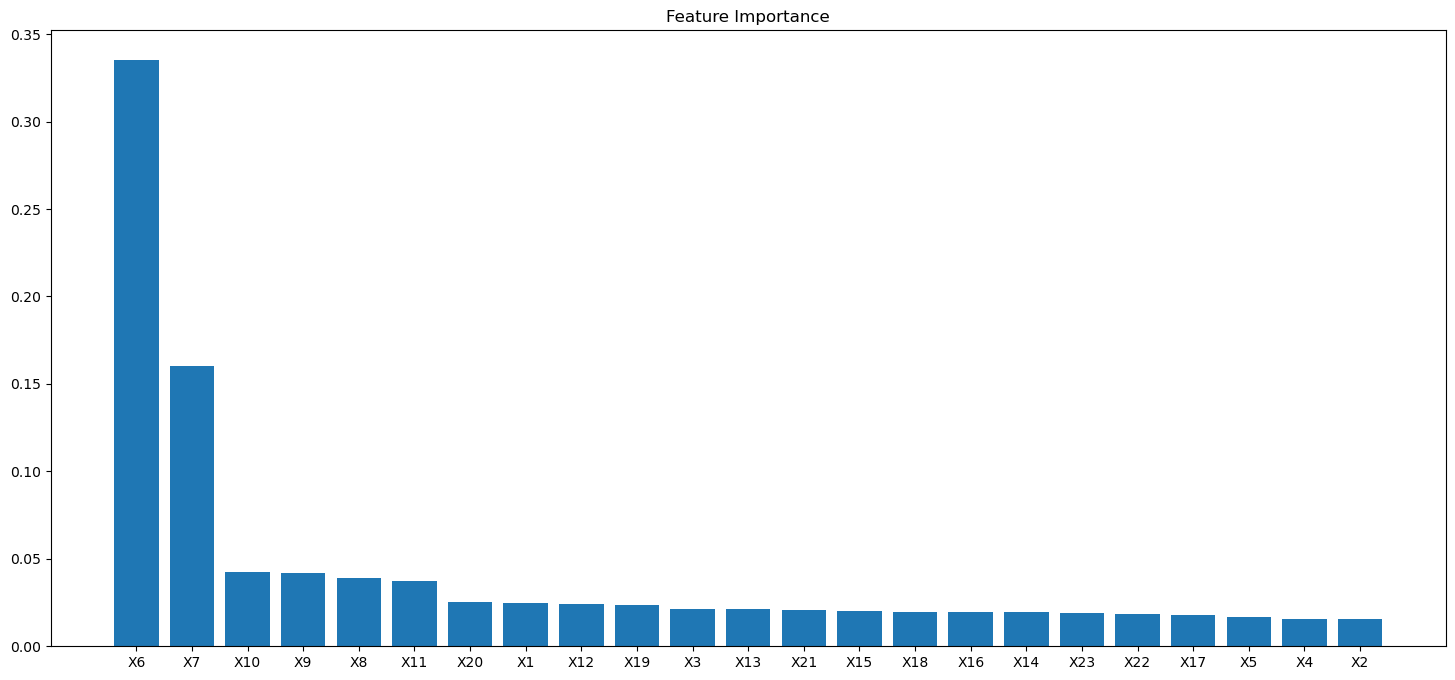

In [145]:
        importances = xgb.feature_importances_
        indices = np.argsort(importances)[::-1]
        names = [train_X.columns[i] for i in indices]
        plt.figure(figsize=(18,8))
        plt.title("Feature Importance")
        plt.bar(range(train_X.shape[1]), importances[indices])
        plt.xticks(range(train_X.shape[1]), names)
        plt.show()

### CatBoost

In [146]:
cat = CatBoostClassifier()
cat.fit(train_X, train_y)
#print(accuracy_score(test_y, cat.predict(test_X)))

print('The f1_score of CatBoost is',f1_score(cat.predict(test_X),test_y,average='weighted'))


Learning rate set to 0.040021
0:	learn: 0.6702434	total: 16.6ms	remaining: 16.6s
1:	learn: 0.6494491	total: 20.9ms	remaining: 10.4s
2:	learn: 0.6307258	total: 24.8ms	remaining: 8.23s
3:	learn: 0.6133443	total: 29.3ms	remaining: 7.29s
4:	learn: 0.5984949	total: 33.8ms	remaining: 6.73s
5:	learn: 0.5839116	total: 39.3ms	remaining: 6.5s
6:	learn: 0.5708195	total: 44ms	remaining: 6.24s
7:	learn: 0.5592621	total: 48.8ms	remaining: 6.05s
8:	learn: 0.5485008	total: 53.7ms	remaining: 5.92s
9:	learn: 0.5390985	total: 68.4ms	remaining: 6.77s
10:	learn: 0.5303422	total: 81.1ms	remaining: 7.29s
11:	learn: 0.5223826	total: 101ms	remaining: 8.29s
12:	learn: 0.5147679	total: 111ms	remaining: 8.44s
13:	learn: 0.5077507	total: 121ms	remaining: 8.49s
14:	learn: 0.5016808	total: 131ms	remaining: 8.62s
15:	learn: 0.4959133	total: 143ms	remaining: 8.8s
16:	learn: 0.4906572	total: 152ms	remaining: 8.81s
17:	learn: 0.4858058	total: 162ms	remaining: 8.83s
18:	learn: 0.4812640	total: 173ms	remaining: 8.95s
19:	

193:	learn: 0.4097645	total: 1.42s	remaining: 5.89s
194:	learn: 0.4096763	total: 1.42s	remaining: 5.87s
195:	learn: 0.4095777	total: 1.43s	remaining: 5.86s
196:	learn: 0.4095235	total: 1.43s	remaining: 5.84s
197:	learn: 0.4094708	total: 1.44s	remaining: 5.82s
198:	learn: 0.4093747	total: 1.44s	remaining: 5.81s
199:	learn: 0.4092627	total: 1.45s	remaining: 5.79s
200:	learn: 0.4091827	total: 1.45s	remaining: 5.78s
201:	learn: 0.4091133	total: 1.46s	remaining: 5.76s
202:	learn: 0.4090038	total: 1.46s	remaining: 5.75s
203:	learn: 0.4089404	total: 1.47s	remaining: 5.73s
204:	learn: 0.4088380	total: 1.47s	remaining: 5.71s
205:	learn: 0.4087439	total: 1.48s	remaining: 5.7s
206:	learn: 0.4086403	total: 1.48s	remaining: 5.68s
207:	learn: 0.4085496	total: 1.49s	remaining: 5.67s
208:	learn: 0.4084183	total: 1.49s	remaining: 5.65s
209:	learn: 0.4082966	total: 1.5s	remaining: 5.64s
210:	learn: 0.4082184	total: 1.5s	remaining: 5.62s
211:	learn: 0.4081435	total: 1.51s	remaining: 5.61s
212:	learn: 0.4

370:	learn: 0.3918761	total: 2.44s	remaining: 4.13s
371:	learn: 0.3917502	total: 2.45s	remaining: 4.14s
372:	learn: 0.3916879	total: 2.46s	remaining: 4.14s
373:	learn: 0.3915690	total: 2.48s	remaining: 4.15s
374:	learn: 0.3914563	total: 2.49s	remaining: 4.15s
375:	learn: 0.3913707	total: 2.5s	remaining: 4.15s
376:	learn: 0.3912863	total: 2.51s	remaining: 4.15s
377:	learn: 0.3912084	total: 2.52s	remaining: 4.15s
378:	learn: 0.3911747	total: 2.53s	remaining: 4.15s
379:	learn: 0.3910997	total: 2.54s	remaining: 4.15s
380:	learn: 0.3909276	total: 2.55s	remaining: 4.15s
381:	learn: 0.3908445	total: 2.56s	remaining: 4.15s
382:	learn: 0.3907705	total: 2.57s	remaining: 4.14s
383:	learn: 0.3906770	total: 2.58s	remaining: 4.14s
384:	learn: 0.3905683	total: 2.6s	remaining: 4.15s
385:	learn: 0.3904884	total: 2.61s	remaining: 4.15s
386:	learn: 0.3904386	total: 2.62s	remaining: 4.15s
387:	learn: 0.3903555	total: 2.63s	remaining: 4.15s
388:	learn: 0.3902570	total: 2.64s	remaining: 4.15s
389:	learn: 0.

546:	learn: 0.3759967	total: 3.88s	remaining: 3.21s
547:	learn: 0.3759010	total: 3.9s	remaining: 3.21s
548:	learn: 0.3758645	total: 3.91s	remaining: 3.21s
549:	learn: 0.3757726	total: 3.92s	remaining: 3.21s
550:	learn: 0.3756766	total: 3.93s	remaining: 3.2s
551:	learn: 0.3755493	total: 3.94s	remaining: 3.2s
552:	learn: 0.3754948	total: 3.95s	remaining: 3.19s
553:	learn: 0.3754587	total: 3.96s	remaining: 3.19s
554:	learn: 0.3753638	total: 3.97s	remaining: 3.18s
555:	learn: 0.3752987	total: 3.98s	remaining: 3.18s
556:	learn: 0.3752096	total: 3.99s	remaining: 3.17s
557:	learn: 0.3751678	total: 4s	remaining: 3.17s
558:	learn: 0.3750724	total: 4.01s	remaining: 3.16s
559:	learn: 0.3750133	total: 4.02s	remaining: 3.16s
560:	learn: 0.3749085	total: 4.02s	remaining: 3.15s
561:	learn: 0.3748227	total: 4.03s	remaining: 3.14s
562:	learn: 0.3747493	total: 4.03s	remaining: 3.13s
563:	learn: 0.3746414	total: 4.04s	remaining: 3.12s
564:	learn: 0.3745556	total: 4.04s	remaining: 3.11s
565:	learn: 0.3744

730:	learn: 0.3619767	total: 5.1s	remaining: 1.88s
731:	learn: 0.3619247	total: 5.11s	remaining: 1.87s
732:	learn: 0.3618749	total: 5.12s	remaining: 1.86s
733:	learn: 0.3617503	total: 5.12s	remaining: 1.86s
734:	learn: 0.3617161	total: 5.13s	remaining: 1.85s
735:	learn: 0.3616541	total: 5.13s	remaining: 1.84s
736:	learn: 0.3615430	total: 5.14s	remaining: 1.83s
737:	learn: 0.3615009	total: 5.15s	remaining: 1.83s
738:	learn: 0.3614052	total: 5.15s	remaining: 1.82s
739:	learn: 0.3613431	total: 5.16s	remaining: 1.81s
740:	learn: 0.3612756	total: 5.17s	remaining: 1.81s
741:	learn: 0.3612219	total: 5.17s	remaining: 1.8s
742:	learn: 0.3611338	total: 5.18s	remaining: 1.79s
743:	learn: 0.3610749	total: 5.19s	remaining: 1.78s
744:	learn: 0.3609854	total: 5.19s	remaining: 1.78s
745:	learn: 0.3608969	total: 5.2s	remaining: 1.77s
746:	learn: 0.3608246	total: 5.2s	remaining: 1.76s
747:	learn: 0.3607617	total: 5.21s	remaining: 1.75s
748:	learn: 0.3606586	total: 5.21s	remaining: 1.75s
749:	learn: 0.36

911:	learn: 0.3497727	total: 6.12s	remaining: 590ms
912:	learn: 0.3497132	total: 6.12s	remaining: 584ms
913:	learn: 0.3496519	total: 6.13s	remaining: 577ms
914:	learn: 0.3495849	total: 6.13s	remaining: 570ms
915:	learn: 0.3495323	total: 6.14s	remaining: 563ms
916:	learn: 0.3493965	total: 6.14s	remaining: 556ms
917:	learn: 0.3493227	total: 6.15s	remaining: 549ms
918:	learn: 0.3492675	total: 6.15s	remaining: 542ms
919:	learn: 0.3491752	total: 6.16s	remaining: 536ms
920:	learn: 0.3491184	total: 6.16s	remaining: 529ms
921:	learn: 0.3490194	total: 6.17s	remaining: 522ms
922:	learn: 0.3489427	total: 6.17s	remaining: 515ms
923:	learn: 0.3488541	total: 6.18s	remaining: 508ms
924:	learn: 0.3487966	total: 6.18s	remaining: 501ms
925:	learn: 0.3486982	total: 6.19s	remaining: 495ms
926:	learn: 0.3485949	total: 6.19s	remaining: 488ms
927:	learn: 0.3485206	total: 6.2s	remaining: 481ms
928:	learn: 0.3484633	total: 6.21s	remaining: 474ms
929:	learn: 0.3483974	total: 6.21s	remaining: 467ms
930:	learn: 0

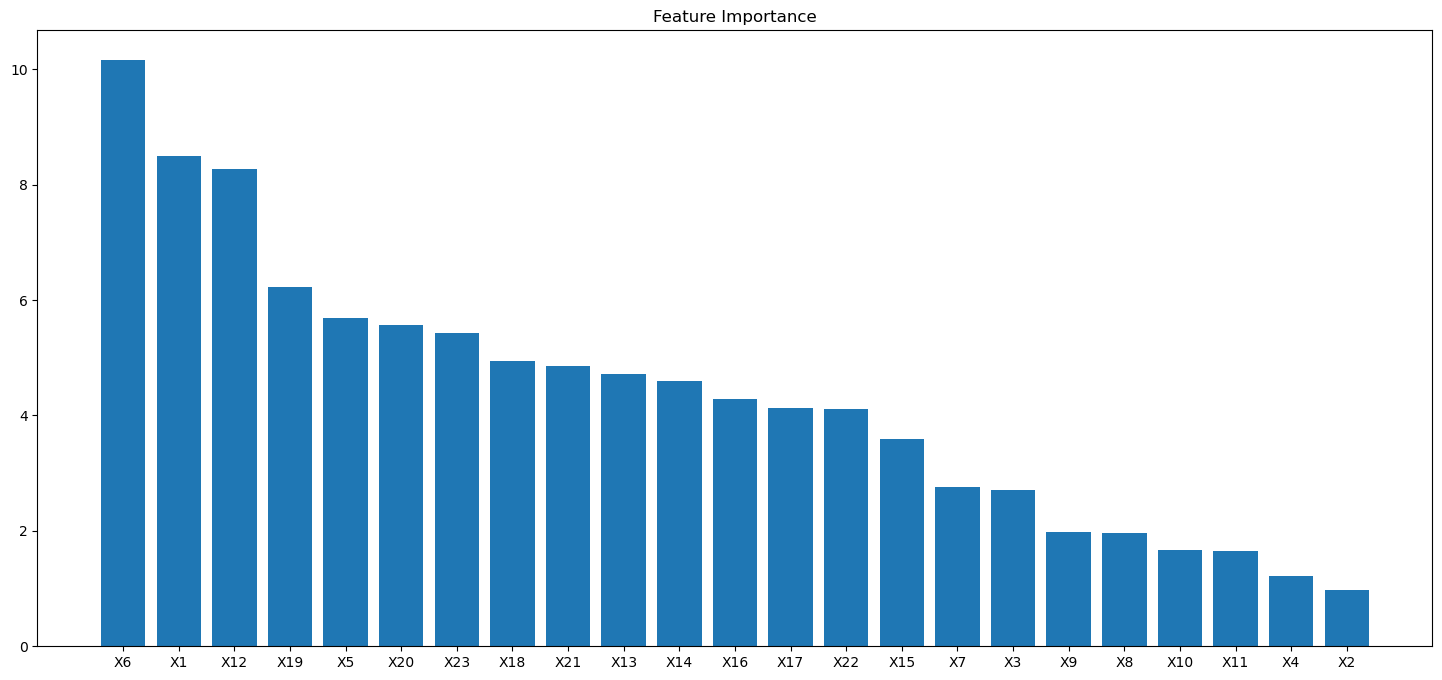

In [147]:
importances = cat.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(18,8))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names)
plt.show()

### kNN

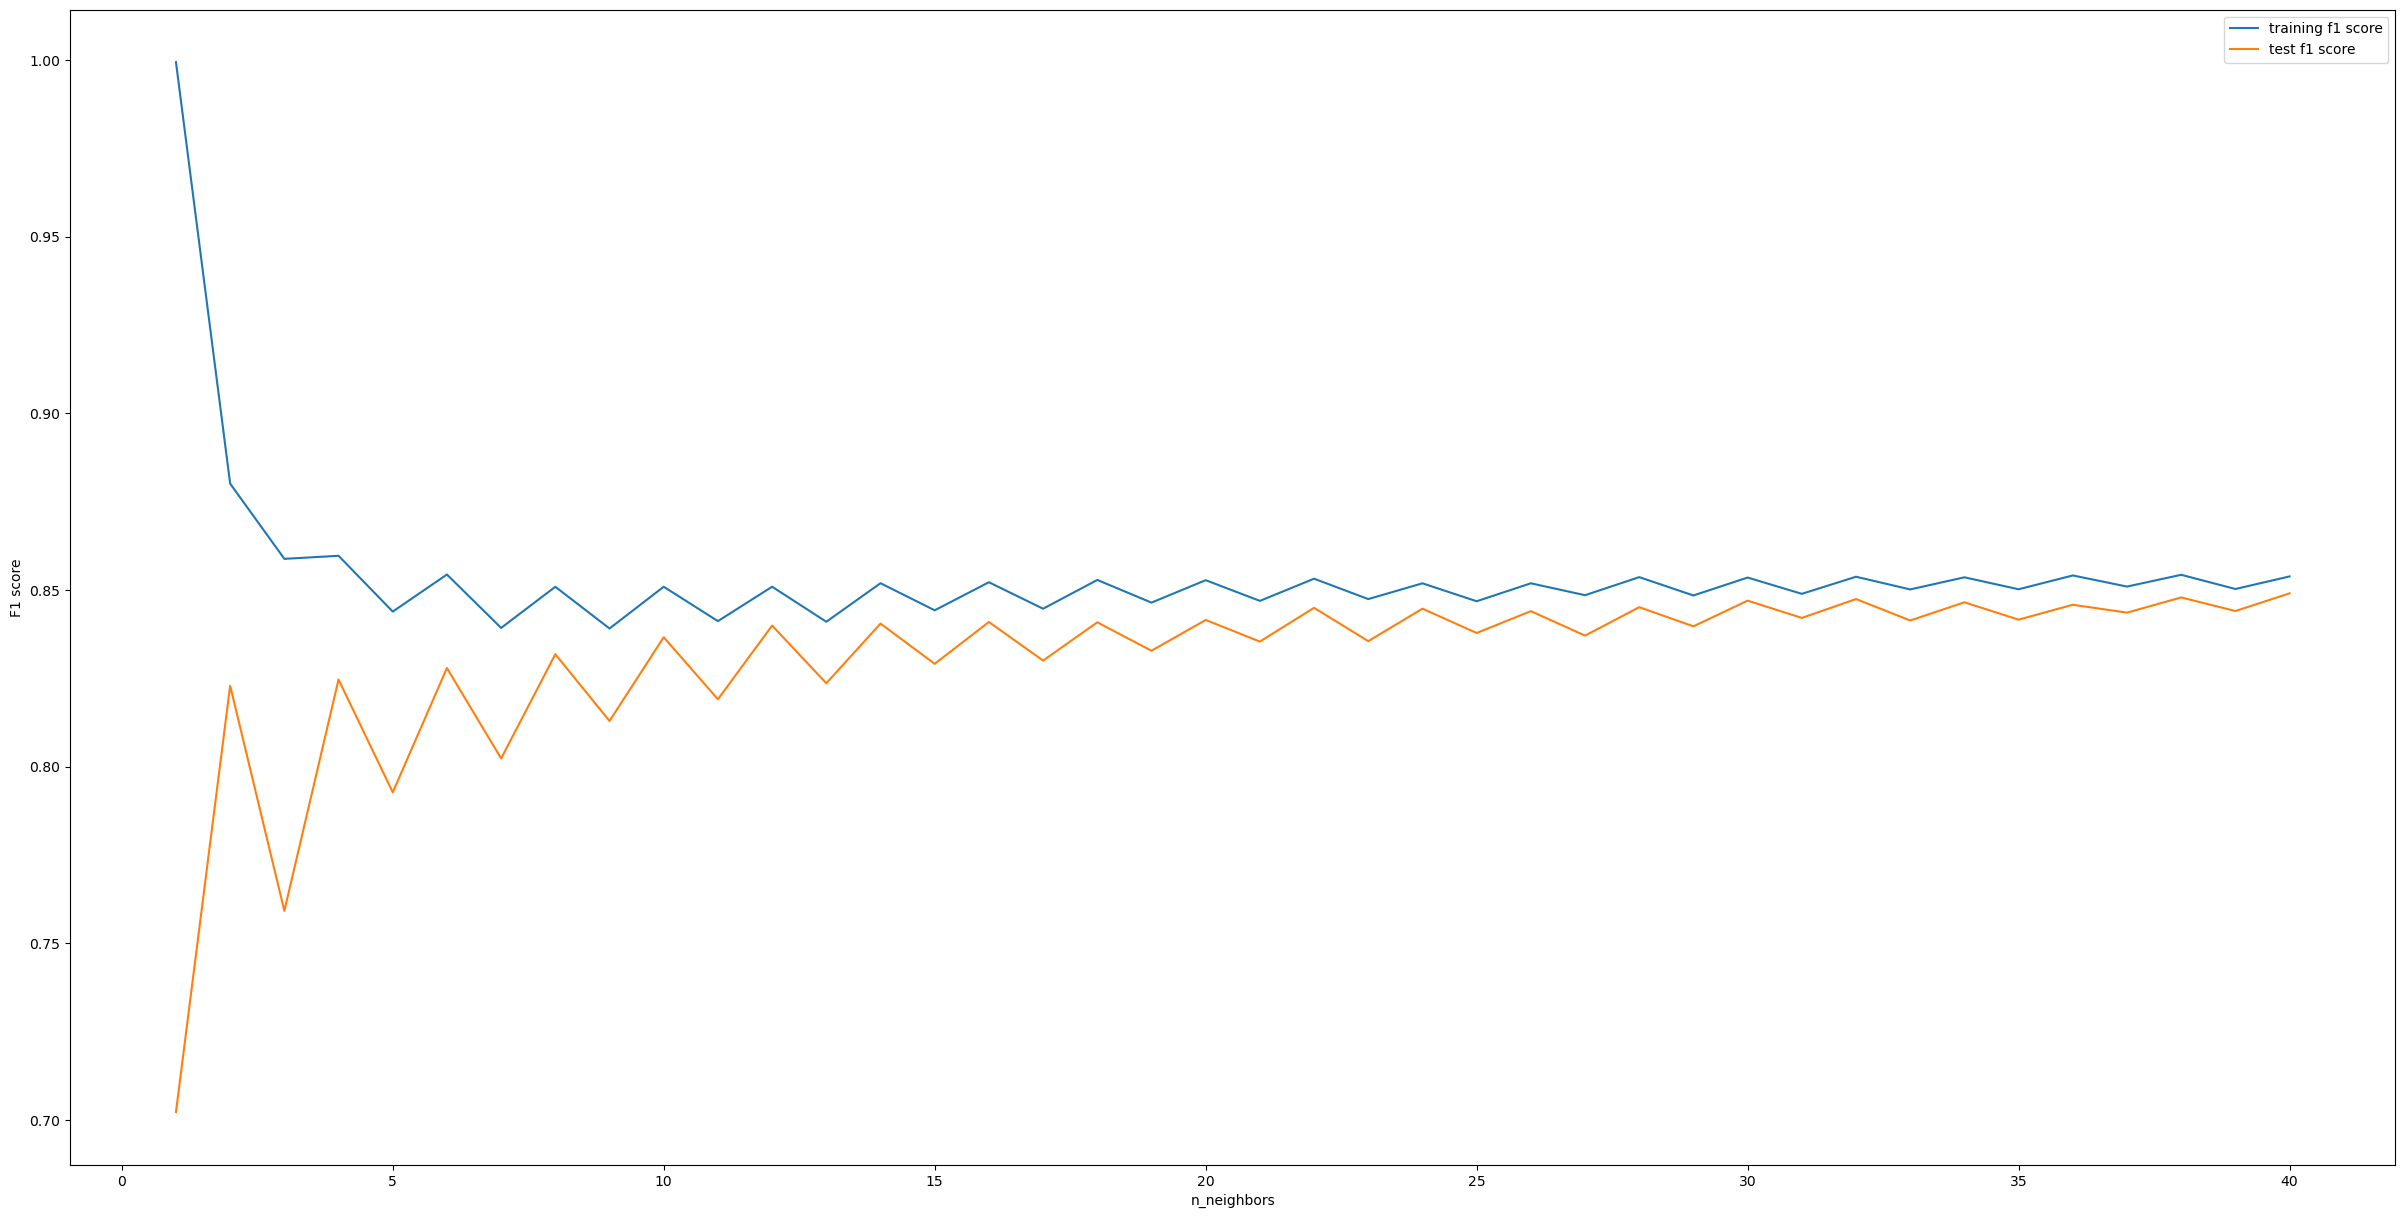

In [141]:
from sklearn.neighbors import KNeighborsClassifier
training_f1 = []
test_f1 = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 41)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X, train_y)
    # record training set accuracy
    training_f1.append(f1_score(knn.predict(train_X),train_y,average='weighted'))
    # record test set accuracy
    test_f1.append(f1_score(knn.predict(test_X),test_y,average='weighted'))



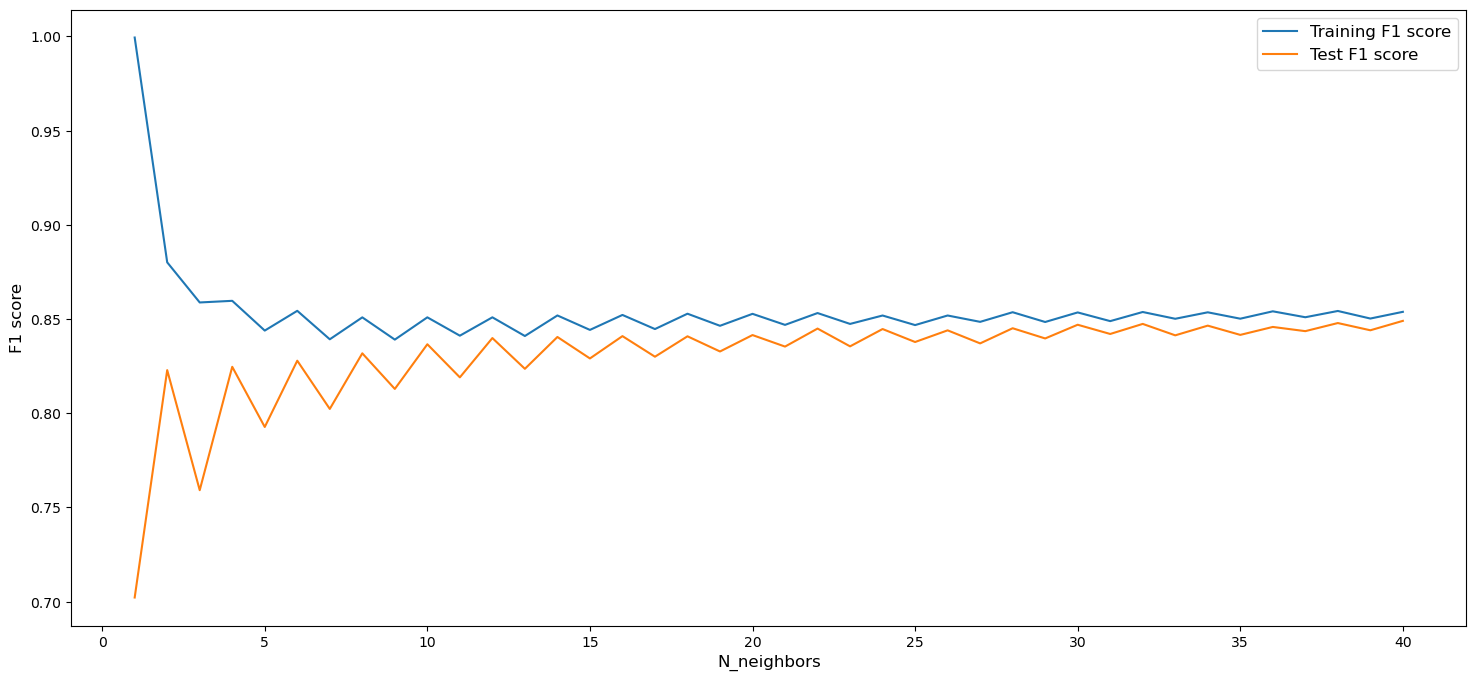

In [154]:
plt.figure(figsize=(18,8))
plt.plot(neighbors_settings, training_f1, label="Training F1 score")
plt.plot(neighbors_settings, test_f1, label="Test F1 score")
plt.ylabel("F1 score", fontsize=12)
plt.xlabel("N_neighbors",fontsize=12)
plt.legend(fontsize=12)
plt.savefig('knn_compare_model')

In [142]:
print("Highest f1 :"+str(max(test_f1)))

Highest f1 :0.8490132661681894


In [156]:
knn1 = KNeighborsClassifier(n_neighbors=1000)
knn1.fit(train_X, train_y)
print(f1_score(knn1.predict(train_X),train_y,average='weighted'))

0.8756412358576747


### Summary:

In this project. I compared different machine learning models: **Decision Tree, Random Forests, Linear Regression, Logistic Regression, XGBClassifier, CatBoost Classifier and kNN**. Results and accuracies are listed above.

In conclusion, **CatBoost Classifier** has the highest accuracy (82%), it's the best model to do prediction for this dataset. However, **Linear Regression**'s accucary is only 11%, so we should not use it in prediction.



## Catboost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks.

Catboost introduces ordered boosting as a better gradient boosting algorithm but the greatest innovation of catboost is how it deals with categorical data. Categorical data introduces several challenges because it has to have a numerical encoding. We could use dummy variables that split the column of n categories into n columns of one-hot encoded features but this can explode our feature set. One tactic is to use target mean encoding, where we assign our category value to the mean of the target variable for that category. Catboost uses a variation on target encoding that calculates the target encoding with available history and a random permutation to encode and process our categorical data. Catboost uses the available history instead of the mean because a model running in real time would not know the true mean for its target. In training we can, of course, calculate the mean because we have all the data and this leads to target leakage where the training accuracy for our model is inflated in comparison to its accuracy in production.

Additional capabilities of catboost include plotting feature interactions and object (row) importance.

### Important Hyperparameters

learning_rate (defualt=0.03): Dictates reduction in gradient step.<br>

iterations (default=1000): Max number of trees that can be built when solving machine learning problems.<br>

l2_leaf_reg (defualt=3): L2 regularization coefficient for leaf calculation, any positive values are allowed.<br>

depth (default=6): Depth of trees, like in XGB it has a high impact on accuracy and training time. It can be any integer up to 32 but a good range is 1-10.<br>

random_strength: The amount of randomness to use for scoring splits, used to avoid overfitting.<br>

bagging_temperature: Defines the settings of the Bayesian bootstrap, bootstrap_type defines the sampling of the weights, Bayesian is the defualt. If set to 1 weights are sampled from an exponential distribution, if 0 then all weights are equal to 1.<br>

border_count(default=254 for cpu, 128 for gpu): The number of splits for numerical features, integers between 1 and 255 are allowed.

ctr_border_count: The number of splits for categorical features. All values are integers from 1 to 255.